# **Clustering Analysis: K-means**

## **1. Import all necessary libraries**

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans # k-means algorithm from scikit learn
import pylab as pl

## **2. Import and preprocess data**

In [20]:
# Set path
path = r'/Users/poojathummar/Documents/career Foundary/Data Immersion/Achi 6 Advanced Analytiics & Dashborad Design/cancer a disease'


In [22]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Lung_cancer_merged_v1.pkl'))

In [24]:
pd.set_option('display.max_columns', None)
df.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound,days_to_start_treatment,days_under_treatment,Country GDP (per capita),Country life expectancy,Country population,treatment_duration
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,True,True,False,False,Combined,2017-11-15,False,True,14,573,42136.12079,80.990244,82348669,Long
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.90625,208,True,False,False,False,Radiation,2024-04-25,False,True,10,359,28279.57871,78.129715,10647720,Medium
2,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.59375,249,True,True,True,False,Surgery,2017-04-14,True,True,6,426,14331.75159,74.580488,1959537,Medium
3,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.59375,300,True,True,False,False,Radiation,2024-03-11,False,True,8,424,52292.81851,81.231138,5570791,Medium
4,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.09375,300,True,True,False,True,Chemotherapy,2019-07-07,False,True,7,403,61591.92887,80.953659,5793636,Medium


In [26]:
df.shape

(2842404, 24)

**Note:** Since it is already known this data has no missing values, duplicates, or extreme values (from previous exercises), I will move straight to removing categorical columns, renaming columns, and standardizing the data

### Dropping categorical data

In [28]:
df.drop(columns = ['gender', 'country', 'diagnosis_date', 'cancer_stage', 'beginning_of_treatment_date', 'family_history', 'smoking_status',
                   'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'treatment_duration'], 
        inplace = True)
df.head()

,age,bmi,cholesterol_level,survived,chronologically_sound,days_to_start_treatment,days_under_treatment,Country GDP (per capita),Country life expectancy,Country population
0,64,31.09375,257,False,True,14,573,42136.12079,80.990244,82348669
1,50,25.90625,208,False,True,10,359,28279.57871,78.129715,10647720
2,51,34.59375,249,True,True,6,426,14331.75159,74.580488,1959537
3,50,32.59375,300,False,True,8,424,52292.81851,81.231138,5570791
4,49,30.09375,300,False,True,7,403,61591.92887,80.953659,5793636


In [30]:
# Rename columns whilst we are here:
df.rename(columns = {'cholesterol_level' : 'cholesterol', 'days_to_start_treatment' : 'days to start treatment', 
                            'days_under_treatment' : 'days under treatment'}, inplace = True)
df.head()

,age,bmi,cholesterol,survived,chronologically_sound,days to start treatment,days under treatment,Country GDP (per capita),Country life expectancy,Country population
0,64,31.09375,257,False,True,14,573,42136.12079,80.990244,82348669
1,50,25.90625,208,False,True,10,359,28279.57871,78.129715,10647720
2,51,34.59375,249,True,True,6,426,14331.75159,74.580488,1959537
3,50,32.59375,300,False,True,8,424,52292.81851,81.231138,5570791
4,49,30.09375,300,False,True,7,403,61591.92887,80.953659,5793636


### Sampling the Data

- Since the dataframe has nearly 3 million observations, I think it would be best for my computer to only work with a small representative sample:

In [32]:
# Set seed
np.random.seed(4)

In [34]:
# Create a list for dividing the dataset into a big and small sample
dev = np.random.rand(len(df)) <= 0.7

In [36]:
# Create small and big subsets
small_df = df[~dev]
big_df = df[dev]

In [38]:
# Check 
print(f'observations in dataframe: {len(df)}')
print(f'observations in small sample: {len(small_df)}')
print(f'observations in big sample: {len(big_df)}')
print(f'observations in both samples: {len(small_df) + len(big_df)}')

observations in dataframe: 2842404
observations in small sample: 852867
observations in big sample: 1989537
observations in both samples: 2842404


### Standardising data

In [40]:
from sklearn.preprocessing import StandardScaler

# Create standard scaler object
scaler = StandardScaler()

# Fit and transform data
scaled_data = scaler.fit_transform(small_df)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns = df.columns)

# Check
scaled_df.head()

,age,bmi,cholesterol,survived,chronologically_sound,days to start treatment,days under treatment,Country GDP (per capita),Country life expectancy,Country population
0,0.900678,0.072297,0.537027,-0.530048,0.0,0.639116,0.941748,0.290814,0.412996,3.022941
1,-0.398043,0.490582,0.352917,1.886623,0.0,-0.483260,-0.121068,-0.878052,-1.759883,-0.667971
2,-0.497945,0.251562,1.526618,-0.530048,0.0,-0.202666,-0.135528,0.717791,0.494658,-0.502168
3,0.900678,-0.428151,-1.672294,-0.530048,0.0,0.218225,1.722592,-0.565434,-1.748308,-0.507840
4,-0.597846,0.837908,0.237848,-0.530048,0.0,-0.763854,0.587476,0.769291,0.480795,-0.346751


## **3. Elbow Technique**

In [42]:
num_cl = range(1,10) # Set range of potential clusters
kmeans = [KMeans(n_clusters = i, n_init = 10) for i in num_cl] 

In [44]:
score = [kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))] 
score

[-7675803.000000009,
 -6401767.48475761,
 -5763752.76309537,
 -5244283.760408329,
 -4823870.2345299935,
 -4517267.833109094,
 -4250877.919381233,
 -4019160.404182139,
 -3845092.915995667]

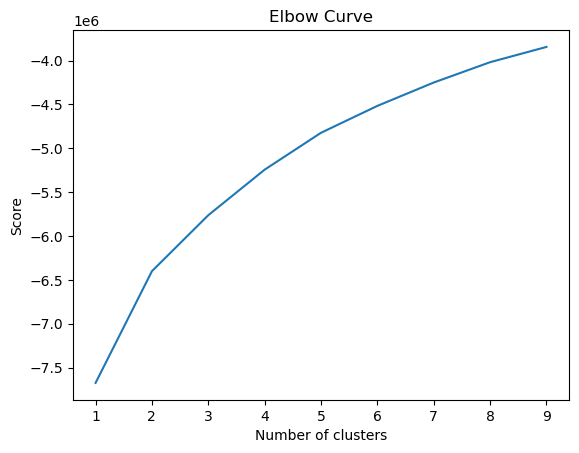

In [45]:
# Plot elbow curve to determine optimal number of clusters (or if k-means is even going to be applicable)

pl.plot(num_cl, score)
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## **4. Decison on clusters**

Based on the elbow curve above, I do not think a k-means analysis would be ideal for my data set. However, if I were to continue the analysis, **2 clusters** would likely be optimal. This is because the curve starts plateauing faster at this point (although not as much as I'd hope for)

## **5. Running the k-means algorithm**

In [48]:
# Create the kmeans object
kmeans = KMeans(n_clusters = 2, n_init = 10)

In [50]:
# Fit the object to the data
kmeans.fit(scaled_df)

KMeans(n_clusters=2, n_init=10)

## **6. Attaching cluster column to data**

In [52]:
# Assign clusters in a new "Assigned Cluster" column
scaled_df['Assigned Cluster'] = kmeans.fit_predict(scaled_df)

# Check this has been added
scaled_df.head()

,age,bmi,cholesterol,survived,chronologically_sound,days to start treatment,days under treatment,Country GDP (per capita),Country life expectancy,Country population,Assigned Cluster
0,0.900678,0.072297,0.537027,-0.530048,0.0,0.639116,0.941748,0.290814,0.412996,3.022941,0
1,-0.398043,0.490582,0.352917,1.886623,0.0,-0.483260,-0.121068,-0.878052,-1.759883,-0.667971,0
2,-0.497945,0.251562,1.526618,-0.530048,0.0,-0.202666,-0.135528,0.717791,0.494658,-0.502168,0
3,0.900678,-0.428151,-1.672294,-0.530048,0.0,0.218225,1.722592,-0.565434,-1.748308,-0.507840,1
4,-0.597846,0.837908,0.237848,-0.530048,0.0,-0.763854,0.587476,0.769291,0.480795,-0.346751,0


In [54]:
# Check value counts
scaled_df['Assigned Cluster'].value_counts(dropna=False)

Assigned Cluster
0    441156
1    411711
Name: count, dtype: int64

## **7. Scatterplots**

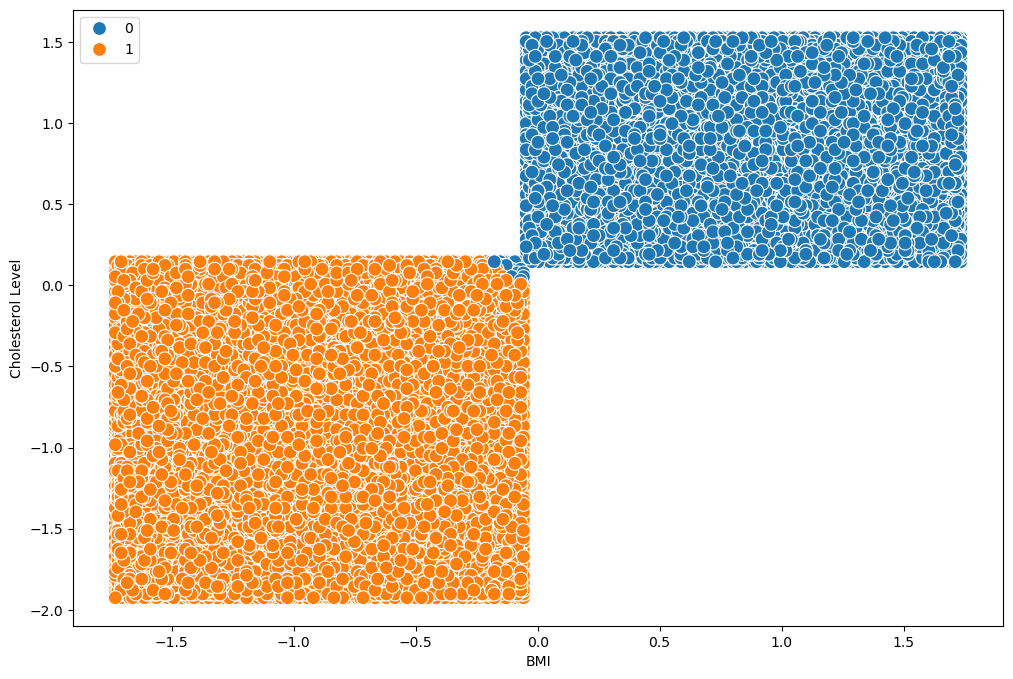

In [56]:
# Plot the clusters for cholesterol and bmi

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_df['bmi'], y = scaled_df['cholesterol'], hue = kmeans.labels_, s=100)

plt.xlabel('BMI')
plt.ylabel('Cholesterol Level')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


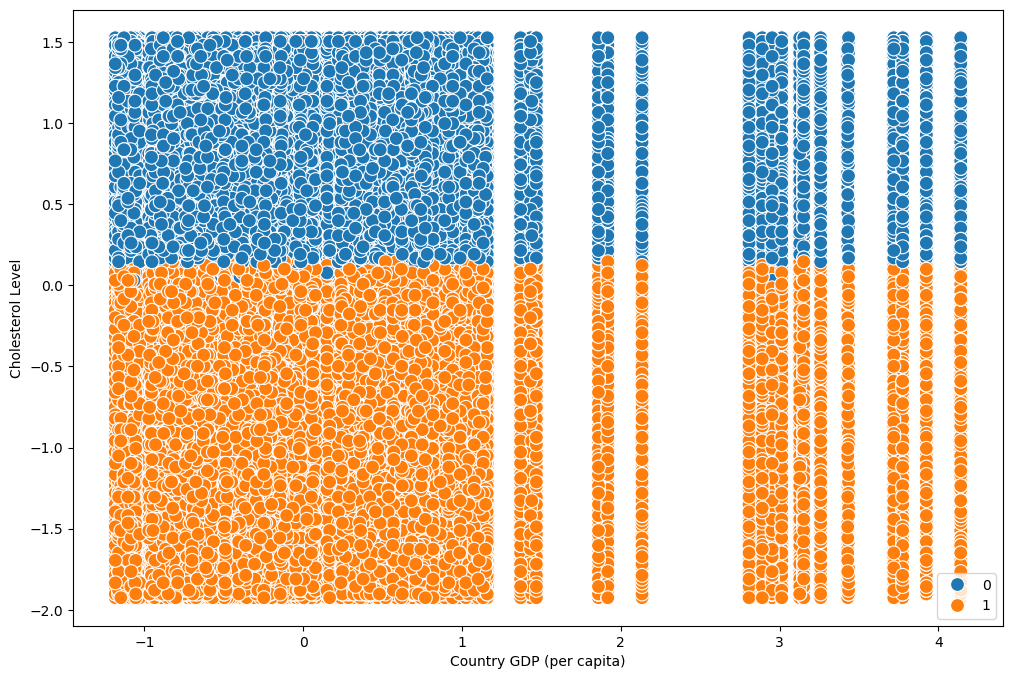

In [59]:
# Plot the clusters for cholesterol and Country GDP

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_df['Country GDP (per capita)'], y = scaled_df['cholesterol'], hue = kmeans.labels_, s=100)

plt.xlabel('Country GDP (per capita)')
plt.ylabel('Cholesterol Level')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


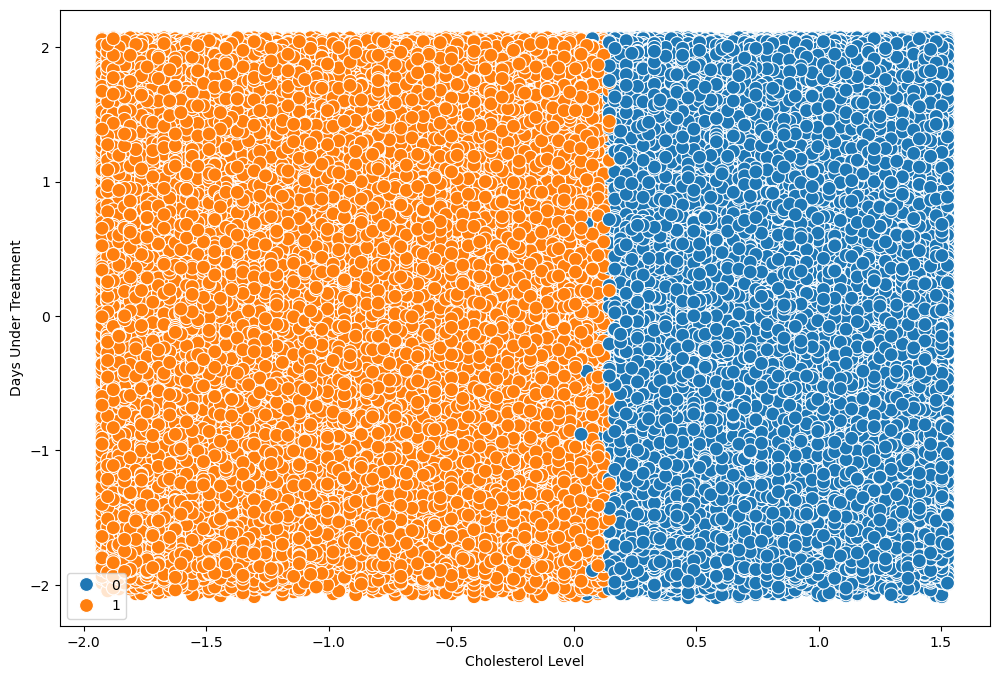

In [62]:
# Plot the clusters for days to cholesterol and days under treatment

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = scaled_df['cholesterol'], y = scaled_df['days under treatment'], hue = kmeans.labels_, s=100)

plt.xlabel('Cholesterol Level')
plt.ylabel('Days Under Treatment')
plt.show()

## **8. Discussion**

The clusters shown in the data do make a lot of sense in context of the variables used. The clusters seem to have been predominantly determined by the relationship between BMI and cholesterol level, since when comparing these two variables, two distinct squares are formed with almost no overlap. The scatterplots between cholesterol level and other variables strengthen this observation, as an almost straight line is drawn at a cholesterol level of approximately 0.1 to 0.2.

Overall, I would say this makes sense, but it is not very useful in terms of an analysis. Even if a link between cholesterol and survivability is found later, the clusters found using this k-means analysis don't give us much useful information about how cholesterol affects or is affected by any other variables other than BMI.

## **9. Descriptive statistics for clusters**

In [63]:
# Undo standardization to make interpretations easier
original_scale_data = scaler.inverse_transform(scaled_data)

# Create a DataFrame with the original Scale
original_df = pd.DataFrame(original_scale_data, columns = df.columns)
original_df['Assigned Cluster'] = kmeans.labels_

# Reassign labels
original_df.loc[original_df['Assigned Cluster'] == 0, 'Assigned Cluster'] = 'Blue'
original_df.loc[original_df['Assigned Cluster'] == 1, 'Assigned Cluster'] = 'Orange'

original_df.head()

/var/folders/xr/ry4453ws78s42ry14chbjm700000gn/T/ipykernel_2754/4010216985.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Blue' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  original_df.loc[original_df['Assigned Cluster'] == 0, 'Assigned Cluster'] = 'Blue'


,age,bmi,cholesterol,survived,chronologically_sound,days to start treatment,days under treatment,Country GDP (per capita),Country life expectancy,Country population,Assigned Cluster
0,64.0,31.09375,257.0,-2.775558e-17,1.0,14.0,573.0,42136.12079,80.990244,82348669.0,Blue
1,51.0,34.59375,249.0,1.000000e+00,1.0,6.0,426.0,14331.75159,74.580488,1959537.0,Blue
2,50.0,32.59375,300.0,-2.775558e-17,1.0,8.0,424.0,52292.81851,81.231138,5570791.0,Blue
3,64.0,26.90625,161.0,-2.775558e-17,1.0,11.0,681.0,21768.14867,74.614634,5447247.0,Orange
4,49.0,37.50000,244.0,-2.775558e-17,1.0,4.0,524.0,53517.89045,81.190244,8955797.0,Blue


In [68]:
original_df.groupby('Assigned Cluster').agg({'age' : ['mean', 'median'],
                                             'bmi' : ['mean', 'median'],
                                             'cholesterol' : ['mean', 'median'],
                                             'survived' : ['mean', 'median'],
                                             'days to start treatment' : ['mean', 'median'],
                                             'days under treatment' : ['mean', 'median'],
                                             'Country GDP (per capita)' : ['mean', 'median'],
                                             'Country life expectancy' : ['mean', 'median'],
                                             'Country population' : ['mean', 'median']})

age               bmi        cholesterol         \
                       mean median       mean median        mean median   
Assigned Cluster                                                          
Blue              54.986583   55.0  37.482812   37.5  269.900085  270.0   
Orange            54.981963   55.0  22.994597   23.0  194.838384  195.0   

                  survived               days to start treatment         \
                      mean        median                    mean median   
Assigned Cluster                                                          
Blue              0.220335 -2.775558e-17                9.456793    7.0   
Orange            0.218253 -2.775558e-17                9.431429    7.0   

                 days under treatment        Country GDP (per capita)  \
                                 mean median                     mean   
Assigned Cluster                                                        
Blue                       441.669029  442.0             35204.959259   
Orange                     443.898079  443.0             35232.777946   

                              Country life expectancy             \
                       median                    mean     median   
Assigned Cluster                                                   
Blue              27226.61564               79.774240  81.180488   
Orange            27226.61564               79.769496  81.180488   

                 Country population             
                               mean     median  
Assigned Cluster                                
Blue                   1.649495e+07  8840521.0  
Orange                 1.652228e+07  8840521.0

I suppose this was to be expected, but the two groups have extremely similar statistics in all columns except for bmi and cholesterol for which the clusters differ greatly.

Overall, this emphasises the lack of correlation between most components in the data and demonstrates how the clusters were predominantly determined by patients' BMIs and cholesterol levels. 

Perhaps, when the data was generated, certain bounds were used to determine a patients BMI or cholesterol level based only on the other variable (this would explain why all the data is confined to two very specific boxes within the scatterplots.

## **Save Data for Tableau**

In [70]:
original_df.shape

(852867, 11)

In [72]:
original_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Data_with_clusters.csv'))